# Data Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
data = pd.read_csv('houseprice.csv')

In [3]:
data.columns
# checking for column names

Index(['Price', 'Sqr Ft', 'Longitude', 'Latitude', 'Lot Size', 'Beds', 'Bath',
       'Year Built', 'Last Sold Year', 'Last Sold For', 'Address', 'City',
       'State', 'Zipcode', 'Address Full'],
      dtype='object')

In [4]:
data.shape
#checking the number of rows and columns

(30006, 15)

In [5]:
data.dtypes
#checking for data types of columns

Price              object
Sqr Ft             object
Longitude         float64
Latitude          float64
Lot Size           object
Beds              float64
Bath              float64
Year Built        float64
Last Sold Year    float64
Last Sold For      object
Address            object
City               object
State              object
Zipcode           float64
Address Full       object
dtype: object

In [6]:
data.sample(3)
#looking at 3 random rows as samples

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
21231,"$399,000","2,600 sqft",-74.20545,40.741344,"3,411 sqft",8.0,3.0,1930.0,2015.0,"$52,500","405 S 15th St Newark, NJ 07103",Newark,NJ,7103.0,"405 S 15th St, Newark, NJ 07103"
8373,"$345,000",NaN,-117.36406,33.988040,0.62 acres,NaN,NaN,NaN,NaN,NaN,"2909 Mulberry St Riverside, CA 92501",Riverside,CA,92501.0,"2909 Mulberry St, Riverside, CA 92501"
23787,"$300,000","2,556 sqft",-95.17290,30.067797,"8,425 sqft",4.0,4.0,1992.0,NaN,NaN,"4211 Meadow Forest Ln Kingwood, TX 77345",Kingwood,TX,77345.0,"4211 Meadow Forest Ln, Kingwood, TX 77345"


In [7]:
data.isnull().sum()
# checking for null values

Price                 0
Sqr Ft             2220
Longitude             0
Latitude              0
Lot Size           4516
Beds               2586
Bath               2510
Year Built         3748
Last Sold Year    15793
Last Sold For     15793
Address               0
City                  0
State                 0
Zipcode               3
Address Full          0
dtype: int64

In [8]:
data.duplicated().sum()
#checking for duplicate rows

8

In [9]:
data.nunique()
#checking for unique values

Price              6058
Sqr Ft             4871
Longitude         28134
Latitude          28234
Lot Size           6818
Beds                 26
Bath                 46
Year Built          166
Last Sold Year       32
Last Sold For      3868
Address           29964
City                676
State                34
Zipcode            2511
Address Full      29964
dtype: int64

In [10]:
data.describe()
# getting the statistical summary of columns with numerical data

,Longitude,Latitude,Beds,Bath,Year Built,Last Sold Year,Zipcode
count,30006.000000,30006.000000,27420.000000,27496.000000,26258.000000,14213.000000,30003.000000
mean,-95.167341,36.158007,3.288658,2.578688,1973.140224,2011.110673,59349.268440
std,15.454027,5.500075,1.472238,1.448891,34.512400,6.596002,27206.130444
min,-150.047160,25.550295,1.000000,0.750000,1800.000000,1987.000000,2108.000000
25%,-106.742751,32.747084,3.000000,2.000000,1950.000000,2006.000000,33137.000000
50%,-93.390977,36.016481,3.000000,2.000000,1978.000000,2013.000000,68124.000000
75%,-81.638904,40.017658,4.000000,3.000000,2004.000000,2017.000000,85016.000000
max,-70.997740,61.442024,65.000000,98.000000,2019.000000,2019.000000,99587.000000


In [11]:
data.mode()
#checking for most repeated values

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,Contact For Estimate,"1,200 sqft",-105.9194,31.865309,0.26 acres,3.0,2.0,2019.0,2017.0,"$125,000","17850 N 68th St Phoenix, AZ 85054",Houston,TX,33131.0,"17850 N 68th St, Phoenix, AZ 85054"


## cleaning the data for more depth analysis

In [12]:
df = data.copy()
#preserving the original dataframe

In [13]:
df.Price.head()
#listing some prices

0    $895,900
1    $247,000
2     $44,900
3    $959,000
4     $83,500
Name: Price, dtype: object

In [14]:
df.Price.dtype
#checking the data type, i.e. object

dtype('O')

In [15]:
price_temp = df.Price.str.replace("$","")
#tring to remove the special characters
price_temp.head()

0    895,900
1    247,000
2     44,900
3    959,000
4     83,500
Name: Price, dtype: object

In [16]:
price_temp= price_temp.str.replace(",","")
#also removing the comma
price_temp.head()

0    895900
1    247000
2     44900
3    959000
4     83500
Name: Price, dtype: object

In [17]:
#checking for data type
price_temp.dtype

dtype('O')

In [18]:
#converting to numeric type
# price_temp.astype(float)

In [19]:
#some values are of string type, which cannot be converted to numeric
price_temp.value_counts()

Price
Contact For Estimate    226
250000                  202
225000                  184
275000                  168
350000                  156
                       ... 
1913000+                  1
485990                    1
35500000                  1
544990+                   1
1281950+                  1
Name: count, Length: 6058, dtype: int64

In [20]:
#some contains Contact for Estimate, and some values also contain the '+' sign
price_temp = price_temp.str.replace("+","")
#handling the '+' symbol
price_temp.value_counts()

Price
Contact For Estimate    226
250000                  205
225000                  184
275000                  169
350000                  156
                       ... 
484414                    1
171719                    1
152322                    1
290990                    1
1281950                   1
Name: count, Length: 5672, dtype: int64

In [21]:
price_temp=price_temp.replace("Contact For Estimate",np.nan)
#replacing the string values with NaN
price_temp.value_counts(dropna=False)

Price
NaN        226
250000     205
225000     184
275000     169
350000     156
          ... 
484414       1
171719       1
152322       1
290990       1
1281950      1
Name: count, Length: 5672, dtype: int64

In [22]:
# Creating a function to combine all the cleaning processes
def clean_prices(price):
        try:
            price = str(price).replace("$","").replace(",","").replace("+","").strip()
            return float(price)
        except Exception:
              return np.nan


In [23]:
df['price_cleaned'] = df.Price.apply(clean_prices) #function applied

In [24]:
df.price_cleaned.describe()

count    2.977800e+04
mean     5.298250e+05
std      1.141234e+06
min      1.000000e+00
25%      1.850000e+05
50%      3.099000e+05
75%      5.345000e+05
max      6.000000e+07
Name: price_cleaned, dtype: float64

In [25]:
df.head()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full,price_cleaned
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",895900.0
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",247000.0
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211",44900.0
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374",959000.0
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169",83500.0


In [26]:
#let's try applying the same method to clean the last sold column
df['last_sold_cleaned'] = df['Last Sold For'].apply(clean_prices)

In [27]:
df.last_sold_cleaned #cleaned last sold column

0              NaN
1              NaN
2              NaN
3         532000.0
4          52000.0
           ...    
30001     345000.0
30002          NaN
30003          NaN
30004          NaN
30005    5500000.0
Name: last_sold_cleaned, Length: 30006, dtype: float64

In [28]:
df.last_sold_cleaned.describe() #statistical summary of cleaned last sold column

count    1.421300e+04
mean     3.469467e+05
std      1.187349e+06
min      1.000000e+00
25%      1.130000e+05
50%      2.098000e+05
75%      3.760000e+05
max      1.200000e+08
Name: last_sold_cleaned, dtype: float64

In [29]:
df.head(2)

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full,price_cleaned,last_sold_cleaned
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",895900.0,NaN
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",247000.0,NaN


In [30]:
df['Lot Size'].value_counts()

Lot Size
0.26 acres    338
0.28 acres    279
0.25 acres    251
0.29 acres    244
1 acre        240
             ... 
7,943 sqft      1
6,102 sqft      1
1085 sqft       1
6,523 sqft      1
5.28 acres      1
Name: count, Length: 6818, dtype: int64

now cleaning the sqr ft and lot size values.... here we have acres and sqft, 2 units.. let's convert the acres to
sqft so that calculations are easy..

In [31]:
#removing the sqft
df['lot_size_cleaned']=df['Lot Size'].str.replace(" sqft","").str.replace(",","")

In [32]:
df['lot_size_cleaned'] #only the acre and acres remain

0               7895
1               7877
2               3510
3               2598
4                NaN
            ...     
30001            NaN
30002    18.84 acres
30003           8276
30004            NaN
30005     5.28 acres
Name: lot_size_cleaned, Length: 30006, dtype: object

using 1 acre = 43560 sqft for standarization

In [33]:
#now removing the acre and acres and converting to float..
def clean_acres(lot):
        try:
            if "acre" in str(lot):
                lot = str(lot).replace(" acres","").replace(" acre","").strip()
                # print(lot)
                # return lot
                return float(lot) * 43560 # 1 acre = 43,560 sqft
            return float(lot)
        except Exception:
            return np.nan


In [34]:
df['lot_size_cleaned']=df['lot_size_cleaned'].apply(clean_acres) #cleaning lot size

In [35]:
df["Lot Size"]

0         7,895 sqft
1         7,877 sqft
2         3,510 sqft
3         2,598 sqft
4                NaN
            ...     
30001            NaN
30002    18.84 acres
30003      8276 sqft
30004            NaN
30005     5.28 acres
Name: Lot Size, Length: 30006, dtype: object

In [36]:
df["lot_size_cleaned"].describe()

count    2.549000e+04
mean     9.334335e+04
std      4.898516e+06
min      1.000000e+00
25%      4.700000e+03
50%      7.405000e+03
75%      1.263240e+04
max      5.502665e+08
Name: lot_size_cleaned, dtype: float64

In [37]:
#cleaning the sqr ft column
df['sqr_ft_cleaned']=df['Sqr Ft'].str.replace(" sqft","").str.replace(",","")

In [38]:
df['sqr_ft_cleaned'] = df['sqr_ft_cleaned'].astype(float)

In [39]:
df

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full,price_cleaned,last_sold_cleaned,lot_size_cleaned,sqr_ft_cleaned
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",895900.0,NaN,7895.0,3447.0
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",247000.0,NaN,7877.0,1767.0
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211",44900.0,NaN,3510.0,1232.0
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374",959000.0,532000.0,2598.0,1417.0
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169",83500.0,52000.0,NaN,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,"$300,000",733 sqft,-80.187720,25.771372,NaN,1.0,1.0,2008.0,2014.0,"$345,000","300 S Biscayne Blvd #T-3507 Miami, FL 33131",Miami,FL,33131.0,"300 S Biscayne Blvd #T-3507, Miami, FL 33131",300000.0,345000.0,NaN,733.0
30002,"$119,000","1,716 sqft",-121.031560,37.680702,18.84 acres,3.0,2.0,1998.0,NaN,NaN,"2621 Prescott Rd #161 Modesto, CA 95350",Modesto,CA,95350.0,"2621 Prescott Rd #161, Modesto, CA 95350",119000.0,NaN,820670.4,1716.0
30003,"$210,000",NaN,-91.137700,30.440481,8276 sqft,NaN,NaN,NaN,NaN,NaN,"17 Claycut Rd #A Baton Rouge, LA 70806",Baton Rouge,LA,70806.0,"17 Claycut Rd #A, Baton Rouge, LA 70806",210000.0,NaN,8276.0,NaN
30004,"$329,000",NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,NaN,"360 Grove St Brooklyn, NY 11237",Brooklyn,NY,11237.0,"360 Grove St, Brooklyn, NY 11237",329000.0,NaN,NaN,NaN


# data cleaning complete, let's visualize the data

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Beds'}>],
       [<Axes: title={'center': 'Bath'}>,
        <Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Last Sold Year'}>],
       [<Axes: title={'center': 'Zipcode'}>,
        <Axes: title={'center': 'price_cleaned'}>,
        <Axes: title={'center': 'last_sold_cleaned'}>],
       [<Axes: title={'center': 'lot_size_cleaned'}>,
        <Axes: title={'center': 'sqr_ft_cleaned'}>, <Axes: >]],
      dtype=object)

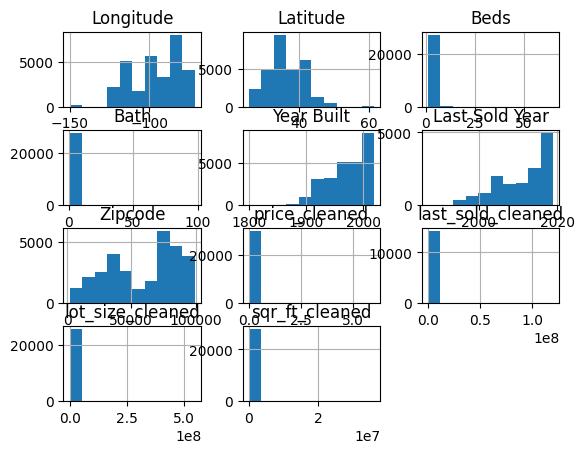

In [40]:
df.hist()

In [41]:
df.head()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full,price_cleaned,last_sold_cleaned,lot_size_cleaned,sqr_ft_cleaned
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",895900.0,NaN,7895.0,3447.0
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",247000.0,NaN,7877.0,1767.0
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211",44900.0,NaN,3510.0,1232.0
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374",959000.0,532000.0,2598.0,1417.0
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169",83500.0,52000.0,NaN,440.0


<Axes: xlabel='price_cleaned', ylabel='Density'>

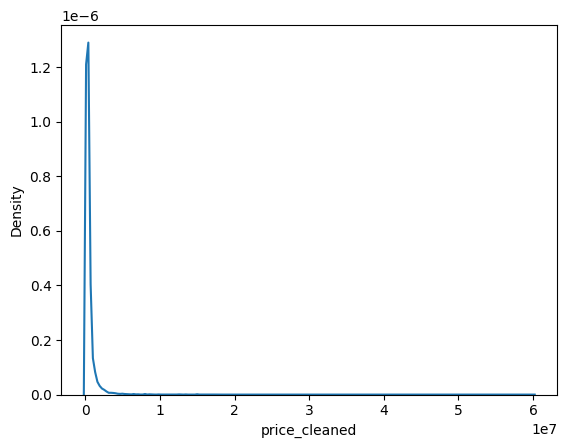

In [42]:
#visualizing the prices
import seaborn as sns
sns.kdeplot(df['price_cleaned'], bw_adjust=0.5)
#this isn't that useful, as it is heavily affected by some values

<Axes: xlabel='log_price', ylabel='Density'>

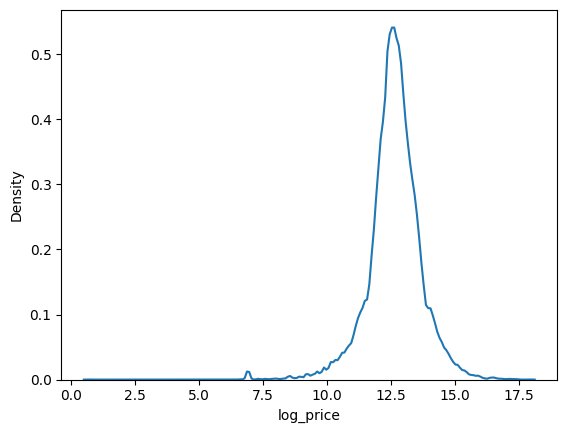

In [43]:
df['log_price'] = np.log1p(df.price_cleaned)
#using the log transformation
sns.kdeplot(df.log_price, bw_adjust=0.5)


This shows that many houses with prices of exp(12.5) are in our data

In [44]:
np.exp(12.5)
#so approx $268337

268337.2865208745

In [45]:
df_new = df.dropna(subset=['Beds','log_price'])


C:\Users\utsab\AppData\Local\Temp\ipykernel_13808\3590078573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Beds = df_new.Beds.astype(int) #converted to int for unique values


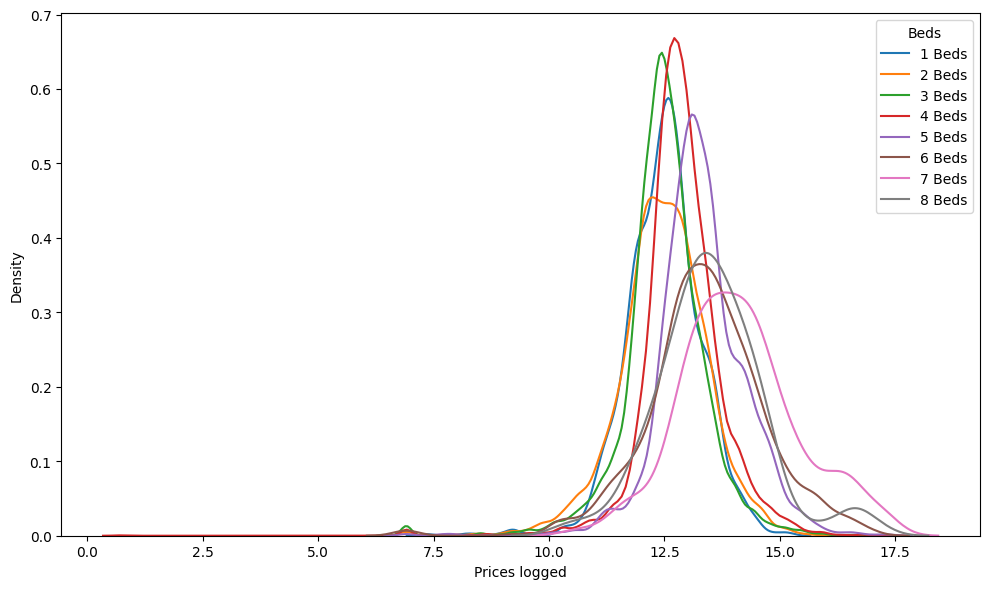

In [46]:
#let's plot the price against some other columns
#let's go with kde plots
#dropping null rows to plot beds and log_price
df_new = df.dropna(subset=['Beds','log_price'])
df_new.Beds = df_new.Beds.astype(int) #converted to int for unique values

plt.figure(figsize=(10,6))
for bed_count in sorted(df_new['Beds'].unique()):
    subset = df_new[df_new['Beds'] == bed_count]
    if len(subset) > 100:  # Only plot if we have more than 100 data values
        sns.kdeplot(subset['log_price'], label=f'{bed_count} Beds', bw_adjust=0.8)
plt.tight_layout()
plt.xlabel('Prices logged')
plt.ylabel("Density")
plt.legend(title="Beds")
plt.tight_layout()
plt.show()

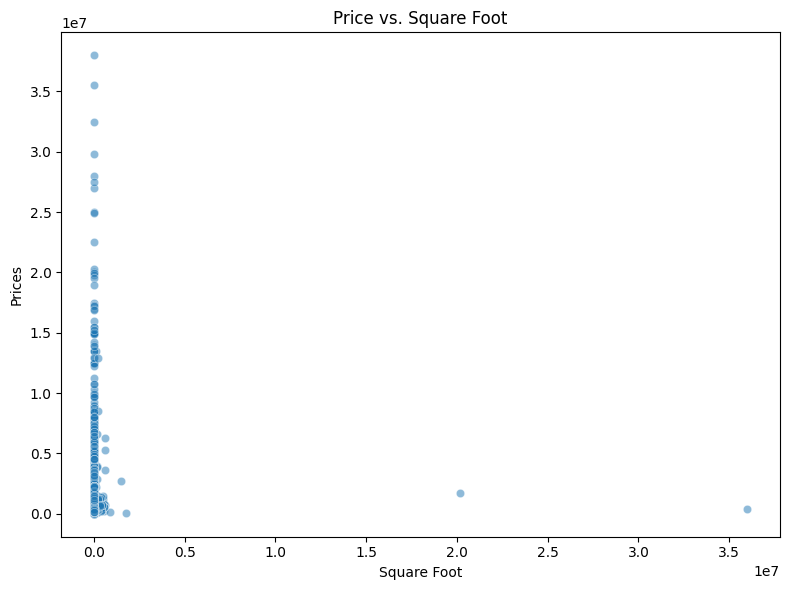

In [47]:
#plotting sqft vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sqr_ft_cleaned', y='price_cleaned', alpha=0.5)
plt.title('Price vs. Square Foot')
plt.xlabel('Square Foot')
plt.ylabel('Prices')
plt.tight_layout()
plt.show()


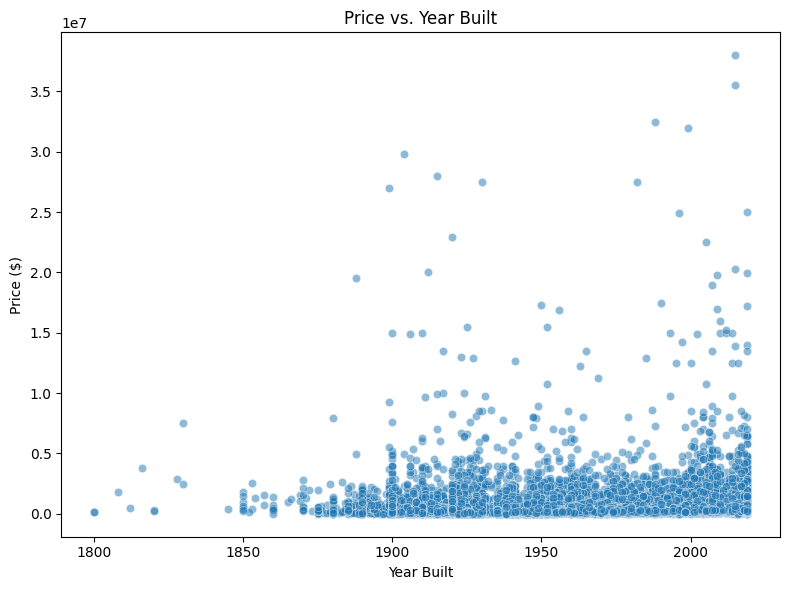

In [48]:
#plotting prices against year built
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Year Built', y='price_cleaned', alpha=0.5)
plt.title('Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


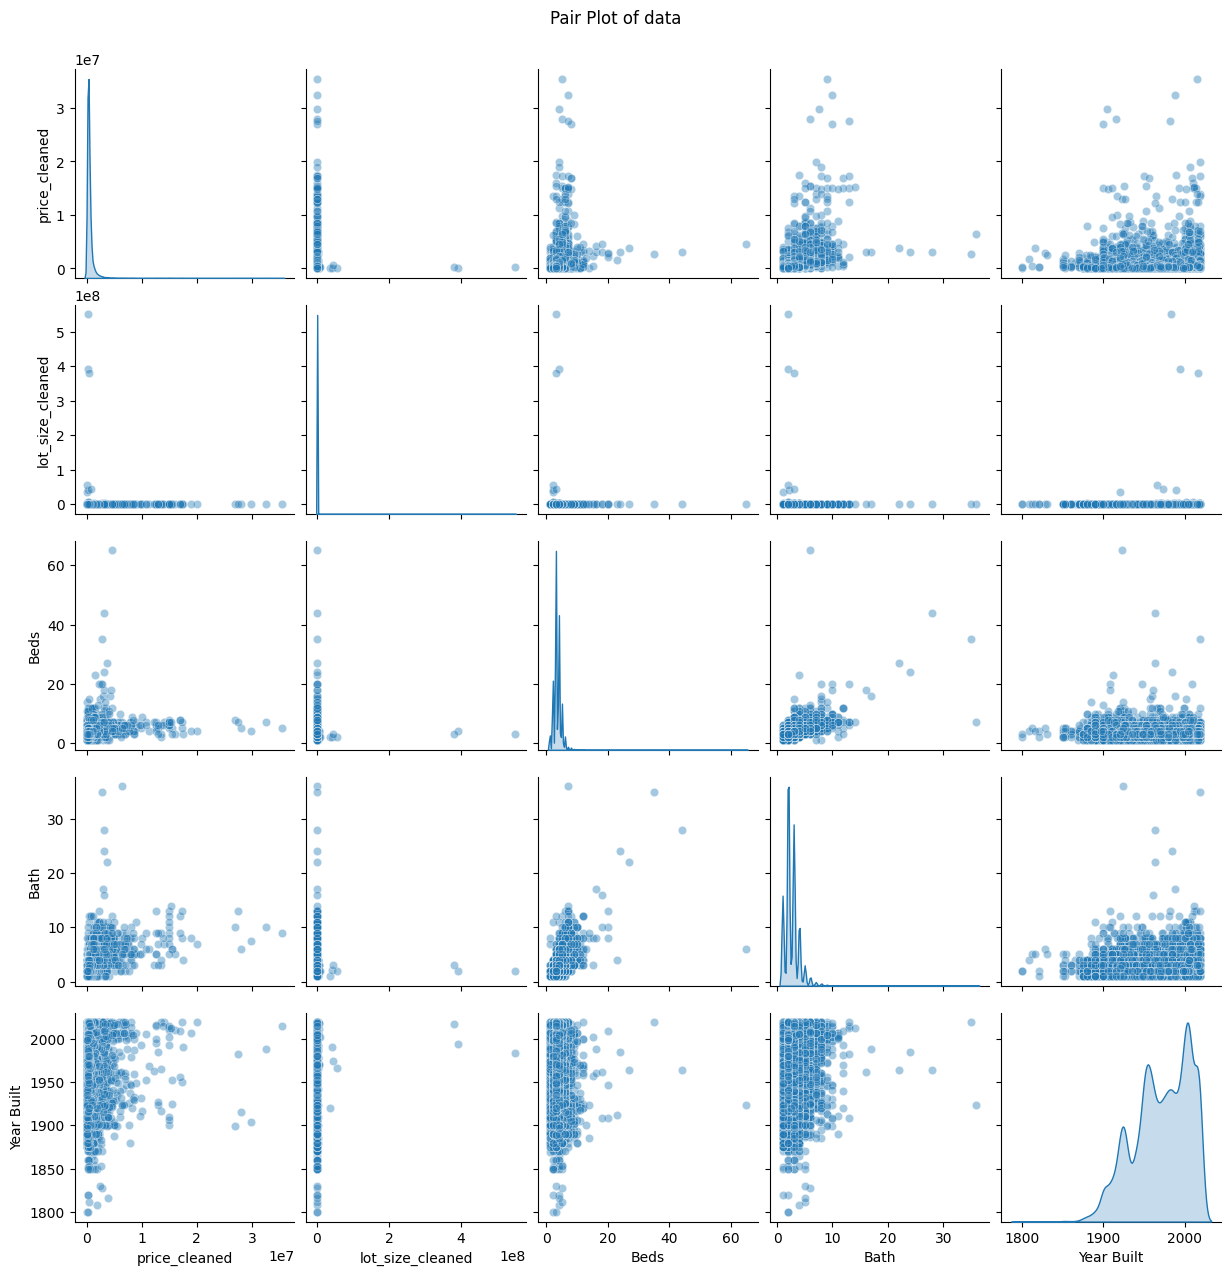

In [49]:
#let's see a pair plot of few columns
selected_cols = ['price_cleaned', 'lot_size_cleaned', 'Beds', 'Bath', 'Year Built']
sns.pairplot(df[selected_cols].dropna(), diag_kind='kde', plot_kws={'alpha': 0.4})
plt.suptitle('Pair Plot of data', y=1.02)
plt.show()



In [50]:
df.head()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full,price_cleaned,last_sold_cleaned,lot_size_cleaned,sqr_ft_cleaned,log_price
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",895900.0,NaN,7895.0,3447.0,13.705585
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",247000.0,NaN,7877.0,1767.0,12.417148
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211",44900.0,NaN,3510.0,1232.0,10.712215
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374",959000.0,532000.0,2598.0,1417.0,13.773647
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169",83500.0,52000.0,NaN,440.0,11.332614


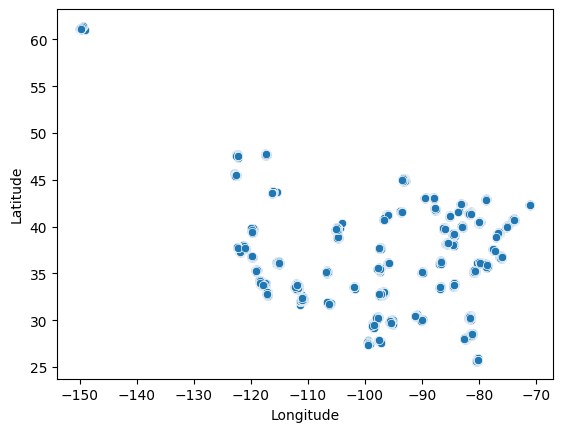

In [51]:
#let's visualize the longititude and latitude data also

df_long_lat = df.dropna(subset=['Longitude','Latitude'])
plt.Figure(figsize=(10,8))
sns.scatterplot(data=df_long_lat,x="Longitude",y="Latitude")
plt.show()

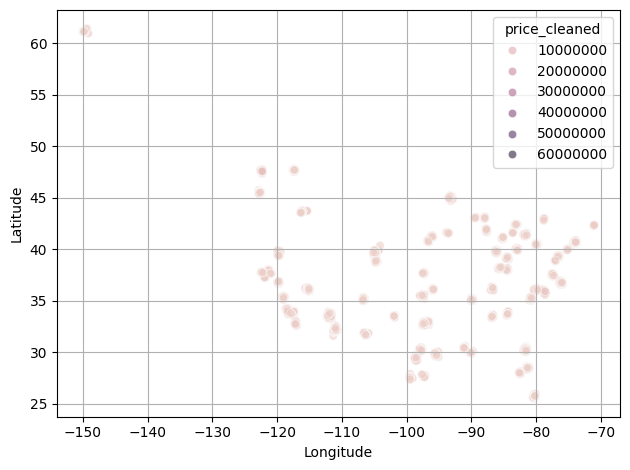

In [52]:
#adding price hue

# df_long_lat = df.dropna(subset=['Longitude','Latitude','price_cleaned'])
plt.Figure(figsize=(10,8))
sns.scatterplot(data=df,x="Longitude",y="Latitude",hue="price_cleaned",alpha=0.6,linewidth=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

# let's handle some missing data and prepare for regression model


In [53]:
df.isnull().sum()

Price                    0
Sqr Ft                2220
Longitude                0
Latitude                 0
Lot Size              4516
Beds                  2586
Bath                  2510
Year Built            3748
Last Sold Year       15793
Last Sold For        15793
Address                  0
City                     0
State                    0
Zipcode                  3
Address Full             0
price_cleaned          228
last_sold_cleaned    15793
lot_size_cleaned      4516
sqr_ft_cleaned        2220
log_price              228
dtype: int64

In [54]:
#we'll simply remove the rows with prices set to null
df_new = df.dropna(subset=["price_cleaned"])

In [55]:
df_new.isnull().sum()

Price                    0
Sqr Ft                2206
Longitude                0
Latitude                 0
Lot Size              4492
Beds                  2538
Bath                  2471
Year Built            3732
Last Sold Year       15669
Last Sold For        15669
Address                  0
City                     0
State                    0
Zipcode                  3
Address Full             0
price_cleaned            0
last_sold_cleaned    15669
lot_size_cleaned      4492
sqr_ft_cleaned        2206
log_price                0
dtype: int64

In [56]:
#we can fill the emopty bath, beds and year with median values
df_new = df_new.fillna(df.median(numeric_only=True))

In [57]:
df_new.isnull().sum()

Price                    0
Sqr Ft                2206
Longitude                0
Latitude                 0
Lot Size              4492
Beds                     0
Bath                     0
Year Built               0
Last Sold Year           0
Last Sold For        15669
Address                  0
City                     0
State                    0
Zipcode                  0
Address Full             0
price_cleaned            0
last_sold_cleaned        0
lot_size_cleaned         0
sqr_ft_cleaned           0
log_price                0
dtype: int64

In [58]:
#let's drop the unnecessary columns
df_new = df_new.drop(columns=['Price','Sqr Ft','Last Sold For','Lot Size','Address'])

In [59]:
df_new.head(3)

,Longitude,Latitude,Beds,Bath,Year Built,Last Sold Year,City,State,Zipcode,Address Full,price_cleaned,last_sold_cleaned,lot_size_cleaned,sqr_ft_cleaned,log_price
0,-112.081985,33.560055,4.0,4.5,2019.0,2013.0,Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",895900.0,209800.0,7895.0,3447.0,13.705585
1,-96.676250,32.829227,3.0,2.0,1954.0,2013.0,Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",247000.0,209800.0,7877.0,1767.0,12.417148
2,-78.825190,42.913000,3.0,1.0,1900.0,2013.0,Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211",44900.0,209800.0,3510.0,1232.0,10.712215


# regression model

we should tokenize the city and state values, as they are in textual form
let's use one hot encoding for city and state;

In [60]:
df_new.City.value_counts()

City
Houston             1072
Chicago              979
San Antonio          947
Las Vegas            939
Miami                818
                    ... 
Kirby                  1
Vinings                1
Richmond Hts           1
Lake View Ter          1
Newburgh Heights       1
Name: count, Length: 675, dtype: int64

In [61]:
city_frequency = df_new.City.value_counts().to_dict()
state_frequency = df_new.State.value_counts().to_dict()
#calculating frequencies of cities and states in the data

In [62]:
state_frequency

{'TX': 4867,
 'CA': 2708,
 'FL': 2704,
 'AZ': 1924,
 'NV': 1495,
 'OH': 1389,
 'NY': 1182,
 'CO': 1025,
 'NC': 1008,
 'PA': 1001,
 'IL': 980,
 'GA': 855,
 'MN': 777,
 'VA': 662,
 'MD': 650,
 'TN': 621,
 'IN': 562,
 'WA': 518,
 'OK': 517,
 'LA': 512,
 'KY': 469,
 'MI': 461,
 'OR': 428,
 'WI': 404,
 'NE': 386,
 'NM': 305,
 'DC': 226,
 'MA': 223,
 'AL': 196,
 'AK': 176,
 'ID': 163,
 'IA': 162,
 'KS': 160,
 'NJ': 62}

In [63]:
#let's map the values to the data
df_new['city_enc'] = df_new.City.map(city_frequency)
df_new['state_enc'] = df_new.State.map(state_frequency)

In [64]:
df_new.city_enc.value_counts()

city_enc
1072    1072
979      979
947      947
939      939
818      818
        ... 
34        34
33        33
29        29
28        28
13        26
Name: count, Length: 135, dtype: int64

In [65]:
df_new.state_enc.value_counts()

state_enc
4867    4867
2708    2708
2704    2704
1924    1924
1495    1495
1389    1389
1182    1182
1025    1025
1008    1008
1001    1001
980      980
855      855
777      777
662      662
650      650
621      621
562      562
518      518
517      517
512      512
469      469
461      461
428      428
404      404
386      386
305      305
226      226
223      223
196      196
176      176
163      163
162      162
160      160
62        62
Name: count, dtype: int64

In [66]:
df_new = df_new.drop(columns=['State','City',"Address Full"])

In [67]:
#let's scale our input data for training
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [68]:
x_data = df_new.drop(columns=['price_cleaned','log_price'])#removing the price values from the input data
y_data = df_new.price_cleaned#the labels for the model

In [69]:
x_scaled = scaler.fit_transform(x_data) #fiting the scaler with the data

In [70]:
x_scaled

array([[-1.09441411, -0.47144574,  0.52059633, ..., -0.0058937 ,
         0.5778008 ,  0.015421  ],
       [-0.09741339, -0.60433167, -0.18723973, ..., -0.01289309,
         0.68964964,  1.94641453],
       [ 1.05783949,  1.22919347, -0.18723973, ..., -0.01512206,
        -0.75160258, -0.47142821],
       ...,
       [ 0.26102055, -1.03867562, -0.18723973, ..., -0.0127556 ,
        -0.38090356, -0.91103598],
       [ 1.3756776 ,  0.82679256,  2.6441045 , ..., -0.0127556 ,
        -0.46399128, -0.47142821],
       [ 1.07220325, -0.0397254 ,  0.52059633, ...,  0.02202883,
        -0.54707899, -0.585595  ]])

using train test split

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#spliting the data into train-test
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_data,test_size=0.2,random_state=30)

fitting the regression model

In [72]:
#building and fitting the regression model
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
#let's predict the prices on the test set
pred = model.predict(x_test)

In [74]:
#let's evaluate the model using mean squared error
mse = mean_squared_error(y_test,pred)

In [75]:
from sklearn.metrics import r2_score

In [76]:
#also let's see the r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)

In [77]:
print(f"MSE: {mse:.2f}")
print(f"RR score: {r2:.4f}")

MSE: 1494747471519.46
RR score: 0.2289


our model's performance is very low

Let's check the correlation matrix of our input data

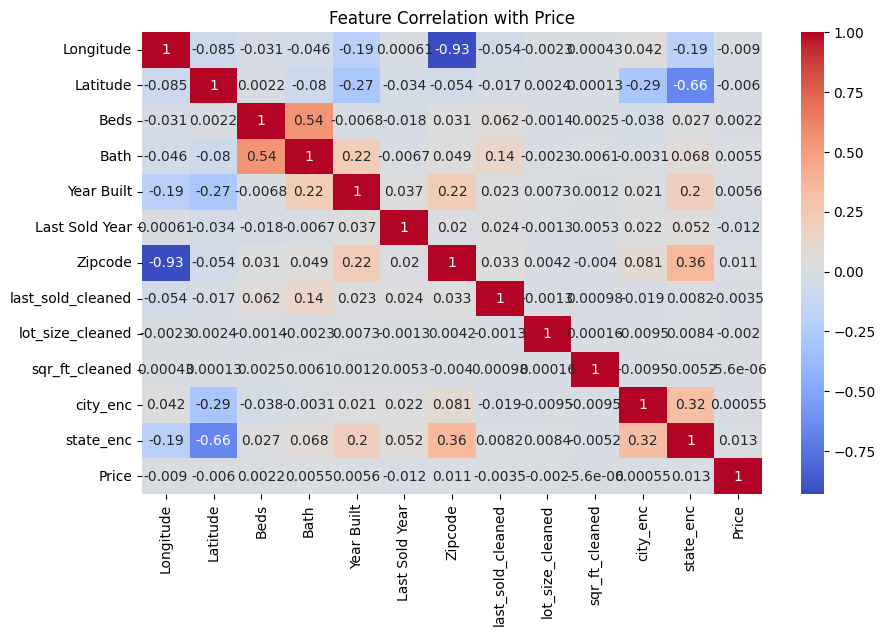

In [78]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_temp = pd.DataFrame(x_scaled, columns=x_data.columns)
df_temp["Price"] = y_data
plt.figure(figsize=(10,6))
sns.heatmap(df_temp.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Price")
plt.show()


Currently our model isn't performing well, so we need to find other alternatives to present our data.
From the above figure, it is clear that the correlation between the fields is very low.

option 1: using random forest regression

In [79]:
#let's try using random forest regressor
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=50, random_state=35)
model2.fit(x_train, y_train)

pred2 = model2.predict(x_test)

rf_mse = mean_squared_error(y_test, pred2)
rf_r2 = r2_score(y_test, pred2)

print(f"Random Forest mse: {rf_mse:.2f}")
print(f"Random Forest RR: {rf_r2:.4f}")


Random Forest mse: 1189443948697.87
Random Forest RR: 0.3864


still, the model's performance is poor

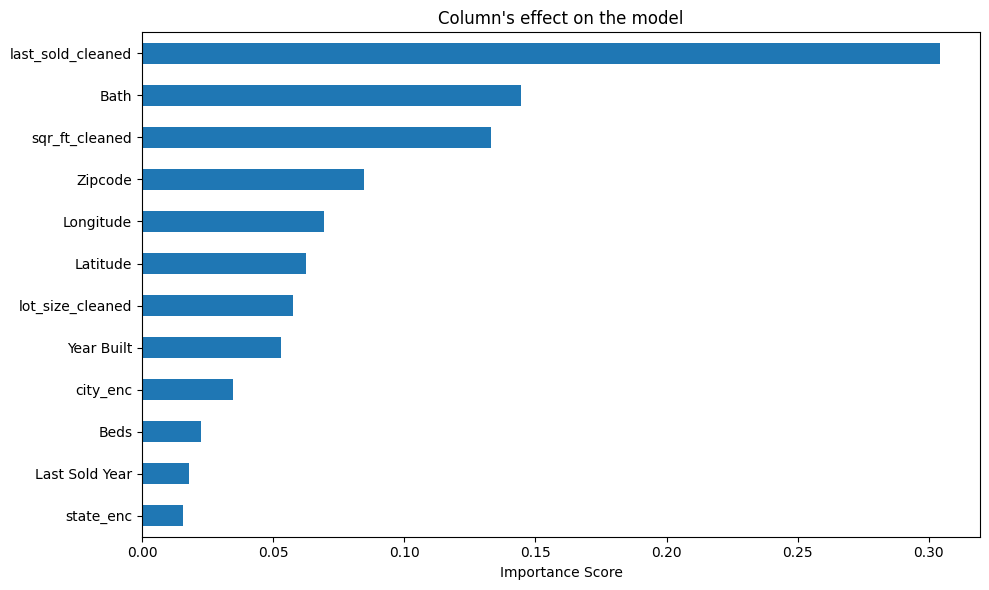

In [80]:
imp_score = pd.Series(model2.feature_importances_, index=df_new.drop(columns=['price_cleaned','log_price']).columns)
imp_score.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Column's effect on the model")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


We can see that last sold price is the most strong feature.
Also columns like bath, sqft, zip code, longtude, latitude are also very dominating.
beds, last sold and state are most irrelevant here...

# Clustering

In [81]:
cluster = df_new[['last_sold_cleaned', 'Bath', 'sqr_ft_cleaned',
                           'Zipcode', 'Longitude', 'Latitude',
                           'lot_size_cleaned', 'Year Built']]
cluster=cluster.dropna()

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster)


let's create a K-means model, so that we can find the number of clusters for our data

also using silhouette score to the correlation between the clusters and the data

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(cluster_scaled, kmeans.labels_))


Let's plot the results to see the number of clusters using the elbow method and the silhouette score as well

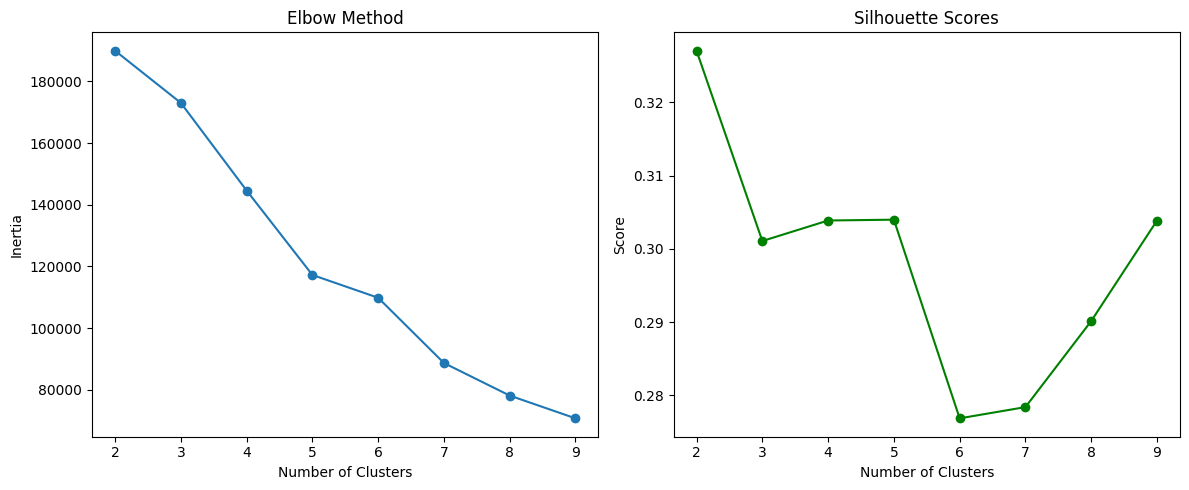

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


From the figures, We can see that the lines flatten at 4-5 points, so let's go with 5 clusters

Let's divide the data into 5 clusters, using the K-means algorithm.

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=35)
labels = kmeans.fit_predict(cluster_scaled)
cluster["cluster"] = labels

In [86]:
cluster

,last_sold_cleaned,Bath,sqr_ft_cleaned,Zipcode,Longitude,Latitude,lot_size_cleaned,Year Built,cluster
0,209800.0,4.5,3447.0,85021.0,-112.081985,33.560055,7895.0,2019.0,0
1,209800.0,2.0,1767.0,75228.0,-96.676250,32.829227,7877.0,1954.0,1
2,209800.0,1.0,1232.0,14211.0,-78.825190,42.913000,3510.0,1900.0,2
3,532000.0,2.0,1417.0,11374.0,-73.860170,40.722960,2598.0,1939.0,2
4,52000.0,1.0,440.0,33169.0,-80.206314,25.937965,7405.0,1971.0,1
...,...,...,...,...,...,...,...,...,...
30001,345000.0,1.0,733.0,33131.0,-80.187720,25.771372,7405.0,2008.0,1
30002,209800.0,2.0,1716.0,95350.0,-121.031560,37.680702,820670.4,1998.0,0
30003,209800.0,2.0,1800.0,70806.0,-91.137700,30.440481,8276.0,1978.0,1
30004,209800.0,3.0,1800.0,11237.0,-73.913930,40.699930,7405.0,2007.0,2


Let's see the stastical properties of each cluster

In [87]:
cluster['price_cleaned'] = df_new.loc[cluster.index, 'price_cleaned']
print(cluster.groupby('cluster')['price_cleaned'].describe())


          count          mean           std       min       25%        50%  \
cluster                                                                      
0        9064.0  6.904827e+05  1.312538e+06    1500.0  259000.0   399900.0   
1        9515.0  4.943213e+05  1.095603e+06     750.0  205000.0   310000.0   
2        5529.0  5.762447e+05  1.337455e+06       1.0  165000.0   299000.0   
3        5668.0  2.870359e+05  4.727802e+05    1000.0  100000.0   198000.0   
4           2.0  1.074500e+06  9.553013e+05  399000.0  736750.0  1074500.0   

                75%         max  
cluster                          
0         698155.75  35500000.0  
1         493030.00  60000000.0  
2         584999.00  32000000.0  
3         331992.50  19500000.0  
4        1412250.00   1750000.0  


plotting sqft vs price differentiated by clusters

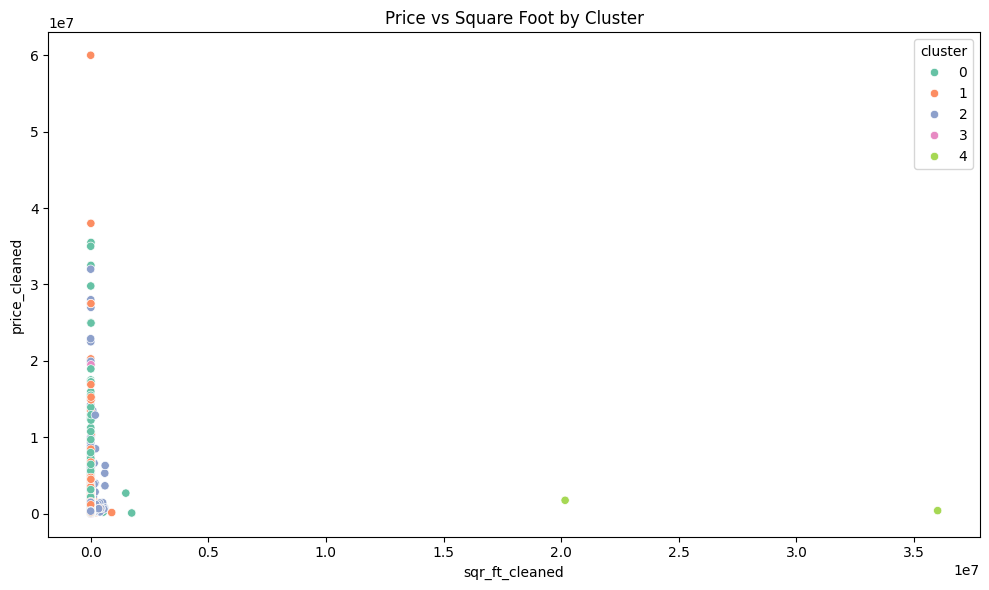

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster, x='sqr_ft_cleaned', y='price_cleaned', hue='cluster', palette='Set2')
plt.title('Price vs Square Foot by Cluster')
plt.tight_layout()
plt.show()


plotting longitude and latitude with clustering

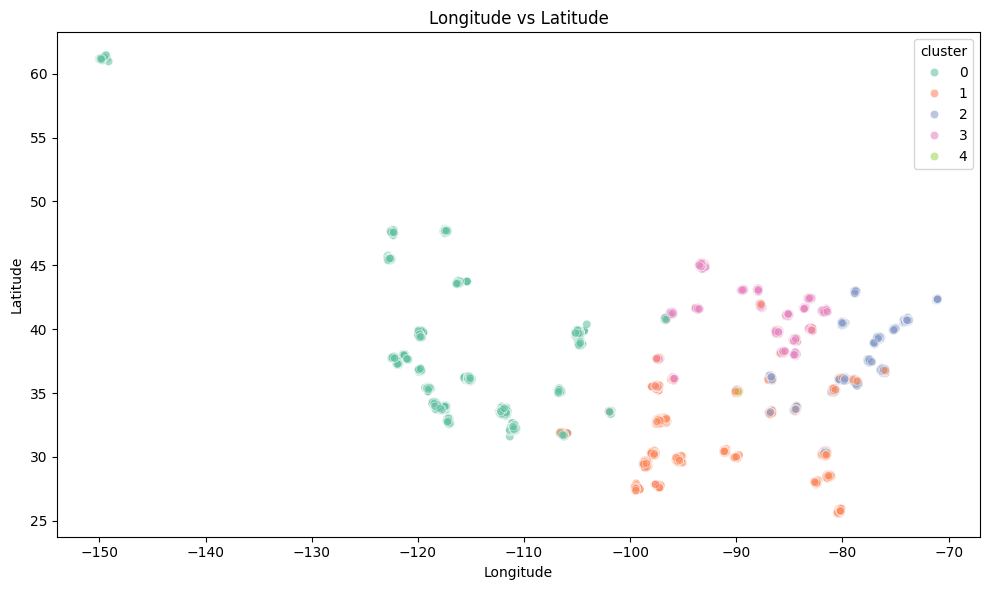

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster, x='Longitude', y='Latitude', hue='cluster', palette='Set2', alpha=0.6)
plt.title('Longitude vs Latitude')
plt.tight_layout()
plt.show()


let's add the labels for the clusters, so that it is easier for end users to understand

In [90]:
cluster_labels = {
    0: 'Budget',
    1: 'Affordable',
    2: 'Mid-range',
    3: 'Premium',
    4: 'Luxury'
}
cluster['team'] = cluster['cluster'].map(cluster_labels)


In [91]:
cluster.to_csv('clustered_properties.csv', index=False) #exporting the clustered data for future use


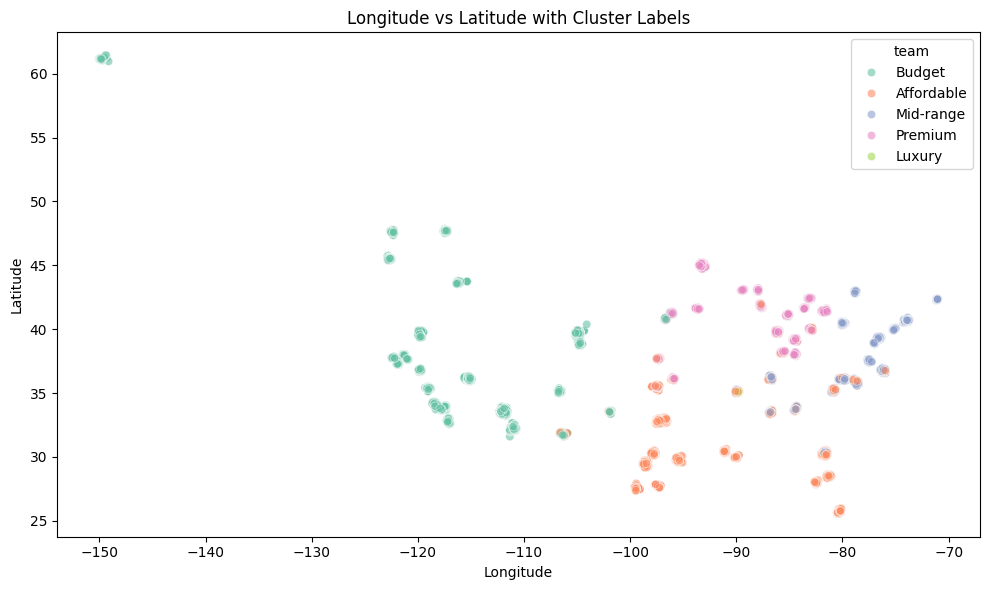

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster, x='Longitude', y='Latitude', hue='team', palette='Set2', alpha=0.6)
plt.title('Longitude vs Latitude with Cluster Labels')
plt.tight_layout()
plt.show()


clustering done
# let's work on classification model

In [93]:
# Features and target
x = df_new[['Beds','Bath','Year Built','sqr_ft_cleaned','lot_size_cleaned',
            'Zipcode','Longitude','Latitude','city_enc','state_enc']]
y = cluster['cluster']   # categorical labels from clustering


using the train test split, as as with previous model

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=40)


usinig RandomForestClassifier with 200 estimators

In [95]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=200, random_state=40)
model3.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Let's see the predictions and evaluate the model

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1813
           1       0.99      0.98      0.99      1903
           2       0.99      0.99      0.99      1106
           3       0.98      0.99      0.99      1134

    accuracy                           0.99      5956
   macro avg       0.99      0.99      0.99      5956
weighted avg       0.99      0.99      0.99      5956

Confusion Matrix:
 [[1811    1    0    1]
 [   4 1868   16   15]
 [   0   10 1093    3]
 [   3    4    0 1127]]


Finally good predictions

This shows that the model is working well with this classification. We used 200 estimators, and got average results of 99%, which is pretty good.

# Advice for the clients

As we saw, our data and model works well with classification. So, adding information about the features that helps us to categorize the houses into different clusters is a good idea. For instance, we can add wether the house has a garage or not or how how big the yard is or how many decoratives are in the house and so on. These features will help us to classify the houses even better, and also help the model to predict better.

# Github Repository Link 
https://github.com/raushan-shah/CSY2082-AS1-assignment 

# Github Commits Evidence
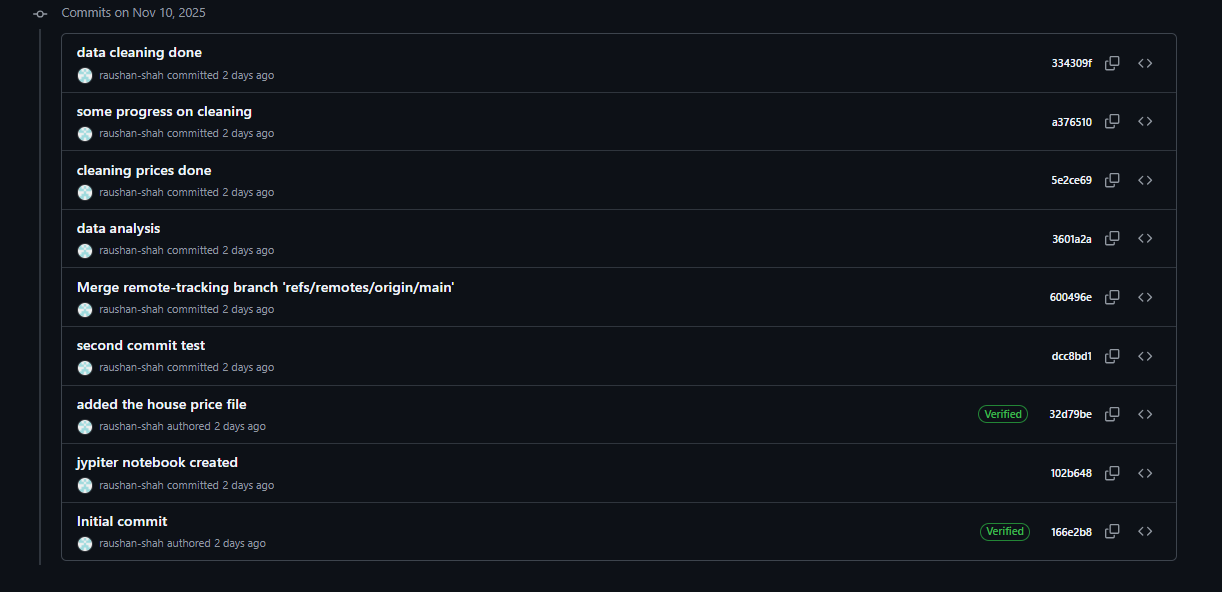
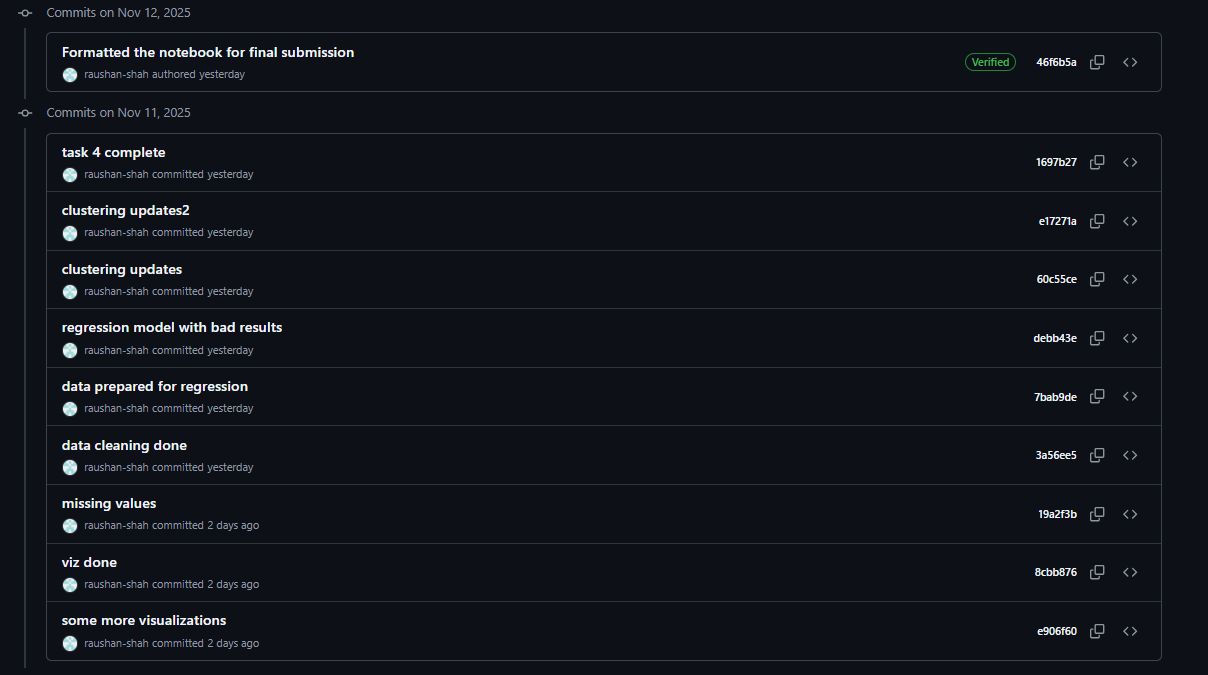